## Confidence Intervals

One of the main applications of the normal distribution: how to find the *statistical uncertainty* associated with the average of a sample.

Assume we have a sample of $n$ observations from a population following a normal distribution with mean $\mu$ and standard deviation $\sigma$.

In practice, we do not know $\mu$ and $\sigma$, but we can calculate an estimate of $\mu$ and $\sigma$:

- As *an estimate* of $\mu$, we use the *average from a sample*.
- As *an estimate* of $\sigma$, we use the *standard deviation from a sample*.

We do not anticipate that the average calculated from a sample corresponds completely to the unknown mean of the population. But maybe we can find an interval that with a high probability contains the unknown mean.



### Formula (Confidence Intervals)

Where:

- $\bar{x}$ is the sample mean
- $s$ is the sample standard deviation
- $n$ is the sample size
- $z$ is the z-score corresponding to a z-score threshold (the most common 95% CI is $z \pm 1.960$, other popular values are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

$$\bar{x} \pm z \frac{s}{\sqrt{n}}$$

#### Examples (Confidence Intervals)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Example 1 (Confidence Intervals)

In [2]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62]) # sample data
xbar = x.mean()
s = x.std()
n = x.size
z = 1.96

In [3]:
# calculating how far from the mean our CI are going to be
def cierr_calc(z, s, n):
    return z*(s/n**(1/2))

In [4]:
CIerr = cierr_calc(z, s, n)
CIerr

np.float64(3.4637403013216796)

In [5]:
xbar - CIerr, xbar + CIerr

(np.float64(51.16125969867832), np.float64(58.08874030132168))

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = 0.05$.

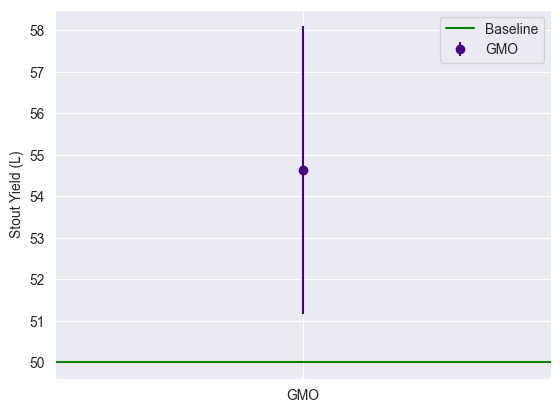

In [7]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', c='indigo') # matplotlib errorbar method
_ = ax.axhline(50, c='green')
plt.grid(True)
plt.legend(['Baseline', 'GMO'])

##### Example 2 (Confidence Intervals)

In [8]:
penguins = sns.load_dataset('penguins').dropna()
adelie = penguins[penguins.species == 'Adelie']
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
m = adelie[adelie.sex =='Male']['body_mass_g'].to_numpy()/1000
fbar = f.mean()
mbar = m.mean()
sf = f.var(ddof=1)
sm = m.var(ddof=1)
nf = f.size
nm = m.size
z = 1.96
fCIerr = cierr_calc(z, sf, nf)
mCIerr = cierr_calc(z, sm, nm)

The CIs are nowhere near overlapping, corresponding to the extremely significant $(-logP\approx25 )$ difference in penguin weight.

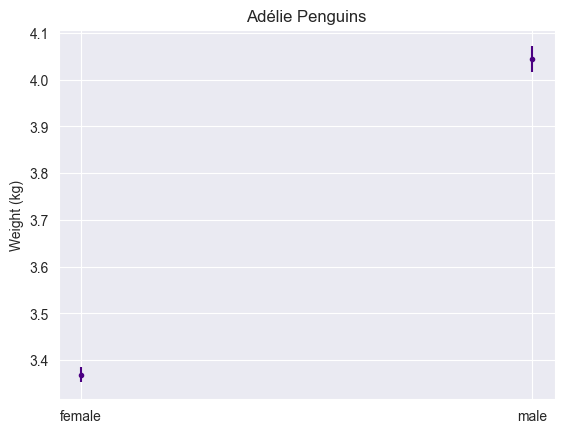

In [12]:
ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr],
                fmt='.', color='indigo')
plt.grid(True)

In contrast, the CIs for female penguins from the three islands...



In [13]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000
means = [t.mean(), b.mean(), d.mean()]
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package
nt, nb, nd = t.size, b.size, d.size
CIerrs = [cierr_calc(z, s_t, nt), cierr_calc(z, sb, nb), cierr_calc(z, sd, nd)]

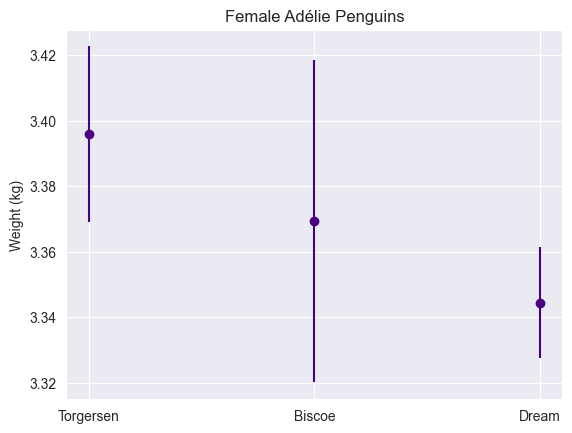

In [14]:
ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs,
                fmt='o', color='indigo')
plt.grid(True)